# Introduction into Unsupervised Learning
***
Unsupervised machine learning digunakan untuk mengelompokkan data tidak terstruktur menurut kesamaan dan pola yang berbeda dari kumpulan data. Disebut *unsupervised* karena pembelajarannya tidak menggunakan label kelas, sehingga disebut tidak ada yang mengawasi. Tujuan pembelajaran ini adalah untuk eksplorasi. <br>
**Kegunaan**<br>
1. **Explore** struktur dari suatu informasi 
2. **Ekstraksi** penemuan yang berharga
3. **Deteksi** pola pada data
4. **Implementasi** teknik UL untuk operasi machine learning lainnya agar meningkatkan efisiensi

# Import Libraries

In [74]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

# Dimensionality Reduction using PCA

## PCA Definition
***
- PCA adalah salah satu teknik untuk mengurangi dimensi pada data dengan cara mengekstrasi informasi pada data dari ruang berdimensi tinggi ke ruang berdimensi rendah dengan memproyeksikannya dengan suatu eigen vektor. <br>
- PCA mencoba untuk mempertahankan variasi pada data yang lebih banyak dan menghapus bagian dari data dengan variasi yang lebih sedikit

## PCA implementation with Python

### Data Loading
***
Data yang digunakan adalah data *breast cancer*

In [3]:
breast_cancer_ = load_breast_cancer()
breast_cancer_data_ = breast_cancer_.data
breast_cancer_label = breast_cancer_.target

In [4]:
breast_cancer_data_.shape, breast_cancer_label.shape

((569, 30), (569,))

In [8]:
breast_cancer_label = np.reshape(breast_cancer_label,(len(breast_cancer_label),1))

### Concate data into dataframe

In [13]:
breast_cancer_df = pd.DataFrame(data=breast_cancer_data_,columns=breast_cancer_.feature_names)
breast_cancer_df['diagnosis'] = breast_cancer_label

In [14]:
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


***
Target: <br>
1. 0 : Benign
2. 1 : Malignant

### Data Visualization using 2 principal component

#### Split attribute and target

In [19]:
X = breast_cancer_df.drop('diagnosis',axis=1)
y = breast_cancer_df['diagnosis']

#### Standarizing data
***
Luaran PCA akan bergantung atau dipengaruhi berdasarkan skala fitur dari data yang diolah

In [20]:
# instansiasi objek Standard scaler
standard_scaler = StandardScaler()

# fit into X
X = standard_scaler.fit_transform(X)

#### fit PCA into X

In [21]:
pca_breast_cancer_ = PCA(n_components=2)

# fit into X
X_pca = pca_breast_cancer_.fit_transform(X)

In [22]:
X_pca.shape

(569, 2)

#### Buat dataframe hasil PCA

In [23]:
breast_cancer_pca_ = pd.DataFrame(data=X_pca, columns=['PC-'+str(i+1) for i in range(X_pca.shape[1])])

In [24]:
breast_cancer_pca_.head()

,PC-1,PC-2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


#### Rasio nilai eigen (variasi) yang mampu dijelaskan setiap principal component

In [25]:
print("Variasi yang mampu dijelaskan setiap principal component")
print(pca_breast_cancer_.explained_variance_ratio_)

Variasi yang mampu dijelaskan setiap principal component
[0.44272026 0.18971182]


In [26]:
np.sum(pca_breast_cancer_.explained_variance_ratio_)

0.632432076515595

**Analisis** <br>
Dengan menggunakan 2 principal component saja kita mampu mendapatkan 0.632432076515595 atau += 63,24% dari 100% informasi yang ada pada data. Dengan 2 principal component kita kehilangan informais sebesar 36,8%

#### Visualisasi data breast cancer ke ranah yang baru
***
Data breast cancer dengan 569 baris data akan divualisasikan ke ranah baru sepanjang principal component 1 dan principal component 2

<Figure size 432x288 with 0 Axes>

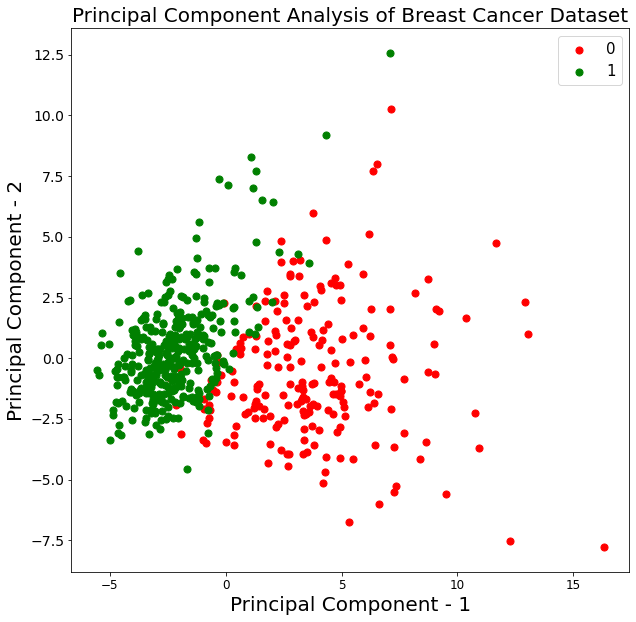

In [33]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = [0, 1]
colors = ['r', 'g']

for target, color in zip(targets,colors):
    indicesToKeep = breast_cancer_df['diagnosis'] == target
    plt.scatter(
        breast_cancer_pca_.loc[indicesToKeep, 'PC-1'], 
        breast_cancer_pca_.loc[indicesToKeep, 'PC-2'],
        c = color,
        s = 50
    )
    
plt.legend(targets,prop={'size': 15})
plt.show()

# K-Means Clustering
***
KMeans clustering adalah algoritma yang digunakan untuk mengelompokkan sekumpulan data ke dalam cluster-cluster dimana setiap clusternya mengandung kumpulan data yang mirip satu sama lainnya berdasarkan beberapa atribut pembeda. <br>
Untuk mengukur kemiripan antar data itu digunakan metriks pengukuran berupa *similarity*. Similarity yang biasanya digunakan adalah perhitungan jarak *Euclidean distance*. Semakin kecil nilai *euclidean distance* antara data A dan data B, maka bisa dikatakan bahwa keduanya mirip, dan begitupun sebaliknya

## Sifat kluster (Properties of clusters)
***
1. **Semua data yang berada dalam 1 kluster, adalah data-data yang mirip satu sama lainnya**
2. **Semua data yang berada dalam kluster yang berbeda, harus sebisa mungkin berbeda satu sama lainnya**
Sifat nomor dua ini menyiratkan bahwa untuk menetapkan suatu kluster, harus mengoptimalkan atribut-atribut yang melekat pada data, sehingga pemisahan klusternya lebih optimal dan tidak saling tumpang tindih

## Clustering evaluation metrics
***
Untuk membedakan cluster yang terbentuk dengan 2 atribut/fitur cukup mudah bagi kita dengan melakukan visualisasi. Namun, data pada kehidupan nyata tidak bisa demikian. Kita sering berurusan dengan fitur yang lebih dari 2 dan akan sangat sulit untuk membedakan kualitas kluster dengan cara visualisasi. Oleh karena itu, dibutuhkan suatu ukuran (metriks) yang bisa digunakan untuk mengevaluasi suatu kluster yang terbentuk. <br>
Metriks yang digunakan adalah **inertia**. <br>
**INERTIA** <br>
Inertia akan menghitung jumlah jarak setiap titik yang berada dalam 1 kluster dengan titik pusat klusternya. Hal ini dilakukan untuk semua kluster yang terbentuk dan akan mendapatkan nilai akhir yaitu jumlah dari semua jarak *intracluster*. <br>
- Inertia adalah penjumlahan dari *intracluster distance* <br>

Kriteria kualitas kluster yang terbentuk adalah **nilai inertia yang kecil**, karena tujuan utama klustering adalah meminimalkan jarak antara titik-titik dalam sebuah cluster


## Kriteria pemberhentian iterasi pada K-Means
***
1. Tidak terjadi perubahan dari centroid saat iterasi sebelumnya dan iterasi saat ini
2. Semua titik tetap berada pada kluster yang sama walaupun sudah dilatih dengan beberapa iterasi
3. Menetapkan sejumlah batas iterasi (maksimum iterasi)

## Menentukan jumlah *k* kluster yang terbentuk
***
**Metode Elbow** bisa digunakan untuk menentukan jumlah *k* kluster optimal yang terbentuk. <br>
- Sumbu x mewakili *k* kluster
- Sumbu y mewakili inertia masing-masing *k* kluster <br>

Metode Elbow akan menentukan titik pada grafik yang berbentuk seperti siku. Titik *k* kluster yang akan dipilih adalah ketika tidak terjadi penurunan nilai *inertia* yang tajam. Titik *k* ketika penurunan nilai *inertia* nya mulai konstan bisa ditentukan sebagai kluster optimal yang terbentuk

## Implementasi K-Means di Python

### Siapkan Data

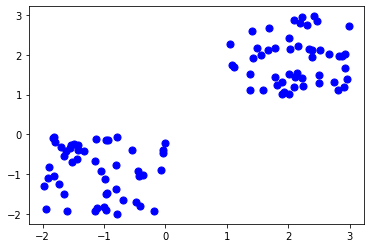

In [35]:
X= -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1

plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = 'b')
plt.show()

### Using Elbow Method untuk menentukan k optimal

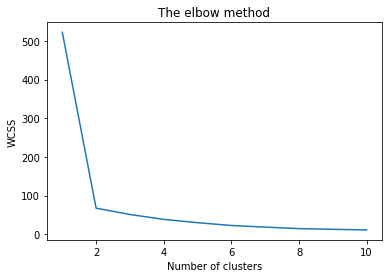

In [36]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

Kluster optimal yang terbentuk adalah 2

### Inisialisasi KMeans dengan 2 kluster

In [37]:
kmeans_ = KMeans(n_clusters=2)

# fit into data
kmeans_.fit(X)

KMeans(n_clusters=2)

### Melihat centroid yang terbentuk

In [39]:
kmeans_.cluster_centers_

array([[-1.11887678, -0.9172082 ],
       [ 2.12052306,  1.85886429]])

### Plotting centroid grafik

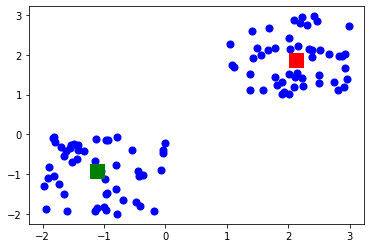

In [43]:
color_centroid=['g','r']
plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = 'b')
for i,centroid in enumerate(kmeans_.cluster_centers_):
    plt.scatter(x=centroid[0], y=centroid[1], s = 200, c = color_centroid[i], marker='s')
plt.show()

## Implementasi KMeans pada real datasets
***
Data wholesalescustomer.csv pada folder dataset akan digunakan untuk praktik kali ini

### Import data

In [44]:
wholesales_df = pd.read_csv('dataset/wholesalecustomer.csv')

In [45]:
wholesales_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [46]:
wholesales_df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Normalize data
***
Perhitungan jarak pada KMeans akan dipengaruhi pada skala setiap data di setiap atributnya.

In [47]:
standard_scaler_kmeans = StandardScaler()

# fit into data
wholesales_scaled = standard_scaler_kmeans.fit_transform(wholesales_df)

### Tentukan k-kluster optimal dengan metode Elbow

#### Menghitung SSE (inertia) setiap kluster yang terbentuk

In [49]:
SSE = []

# hitung SSE untuk k=1 sampai k=20
for k in range(1,20):
    kmeans__ = KMeans(n_clusters=k)
    kmeans__.fit(wholesales_scaled)
    SSE.append(kmeans__.inertia_)    

#### Konversi hasil SSE ke dataframe dan plotting

In [54]:
clusters = list(range(1,20))
sse_df = pd.DataFrame(data={
    'Clusters': clusters,
    'SSE':SSE
})

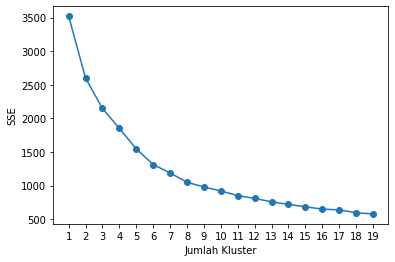

In [58]:
plt.plot(sse_df['Clusters'],sse_df['SSE'], marker='o')
plt.xticks(ticks=clusters, labels=clusters)
plt.ylabel('SSE')
plt.xlabel('Jumlah Kluster')
plt.show()

Terlihat bahwa dari k=8 penurunan inertia mulai konstan

### Define KMeans using k=8

In [59]:
kmeans_final = KMeans(n_clusters=8)

kmeans_final.fit(wholesales_scaled)
wholesales_kmeans_pred = kmeans_final.predict(wholesales_scaled)

In [61]:
wholesales_df_clustered = pd.DataFrame(data=wholesales_scaled)
wholesales_df_clustered['Labels KMeans'] = wholesales_kmeans_pred

In [64]:
wholesales_df_clustered.head()

,0,1,2,3,4,5,6,7,Labels KMeans
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,4
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,4
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,4
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,0
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,4


<AxesSubplot:>

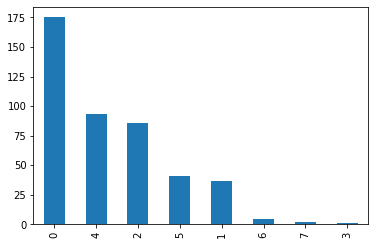

In [65]:
wholesales_df_clustered['Labels KMeans'].value_counts().plot(kind='bar')

# Example Save Model Trained using Pickle

## Defining the data (Attributes and Target)

In [66]:
# Assigning features and label variables
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny', 'Rainy','Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']


## Encoding the categorical features

In [69]:
#creating labelEncoder
le = LabelEncoder()

# Converting string labels into numbers.
weather_encoded=le.fit_transform(weather)
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)

#Combinig weather and temp into single listof tuples
features=list(zip(weather_encoded,temp_encoded))

## Defining Gaussian Model

In [73]:
gaussian_model_ = GaussianNB()

# Train the model using the training sets
gaussian_model_.fit(features,label)

GaussianNB()

## Simpan model yang sudah dilatih

In [76]:
# save the model to disk
filename = 'gaussian_model.sav'
pickle.dump(gaussian_model_, open(filename, 'wb'))

## Memanggil model yang sudah disimpan untuk melakukan prediksi

In [77]:
gaussian_model_ = pickle.load(open(filename,'rb'))

In [79]:
gaussian_model_.predict([[0,2]])

array([1], dtype=int64)

## Exercise

In [85]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors


colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

In [56]:
digits = load_digits()

In [61]:
data = digits.data
labels = digits.target
features_name = digits.feature_names +['target']

In [51]:
final_data = np.concatenate((data,np.reshape(labels,(len(labels),1))),axis=1)

In [63]:
digits_df = pd.DataFrame(data=final_data,columns=features_name)

In [65]:
# Splitting attributes and target
X = digits_df.drop('target',axis=1)
y = digits_df['target']

### PCA 

In [66]:
pca_digits = PCA(n_components=2)
X = pca_digits.fit_transform(X)

In [68]:
digits_pca_df = pd.DataFrame(data=X,columns=['PC-'+str(i) for i in range(2)])

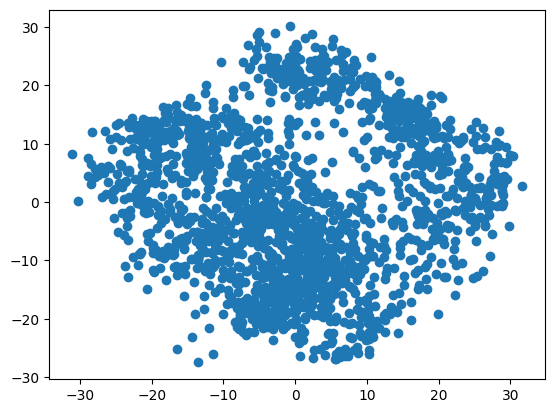

In [92]:
plt.scatter(x=digits_pca_df['PC-0'],y=digits_pca_df['PC-1'])
plt.show()

## Clustering

In [95]:
digits_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9.0


In [114]:
digits_df['target'].unique()

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [115]:
X_cluster = digits_df.drop('target',axis=1)
y_cluster = digits_df['target']

### Standarized Data

In [116]:
scaler_kmeans = StandardScaler()
X_cluster = scaler_kmeans.fit_transform(X_cluster)

In [117]:
from sklearn.cluster import KMeans

In [118]:
kmeans_digits = KMeans(n_clusters=len(digits_df['target'])).fit(X_cluster)

In [119]:
labels_kmeans = kmeans_digits.labels_

In [120]:
labels_kmeans

array([1740, 1569,   87, ...,  962,  382,  275])

In [ ]:
### Tasks
### ========
### 1. PCA 2 dimensi, visualize data nya berdasarkan label -> legend: label
### 2. clustering, PCA 2d, visualize -> legend: cluster label

In [ ]:
label = model.predict(X)
list_label = [0,1]
list_color = ['r', 'b']
for target, color in zip(list_label,list_color):
    indicesToKeep = label == target
    plt.scatter(X[indicesToKeep,0]
               , X[indicesToKeep,1], c = color, s = 50)

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html